# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 583
['tiksi', 'college', 'faya-largeau', 'bredasdorp', 'sitka', 'beaudesert', 'iqaluit', 'waitangi', 'punta arenas', 'port-aux-francais', 'kirakira', 'albany', 'blackmans bay', 'sinop', 'ciudad de huajuapan de leon', "la'ie", 'edinburgh of the seven seas', "'ohonua", 'olonkinbyen', 'ardakan', 'stanley', 'tsiombe', 'puerto natales', 'burewala', 'kodiak', 'adamstown', 'thompson', 'argostolion', 'wailua homesteads', 'devinuwara', 'isla vista', 'aasiaat', 'nova xavantina', 'haiku-pauwela', 'isafjordur', 'bilibino', 'qaqortoq', 'colonia', 'ribeira grande', 'pariang', 'san antonio de pale', 'longyearbyen', 'georgetown', 'eydhafushi', 'lerwick', 'yellowknife', 'yamada', 'enewetak', 'pisco', 'uliastay', 'island harbour', 'lyantor', 'lobito', 'avarua', 'mount isa', 'ushuaia', 'cidreira', 'tolanaro', 'balcarce', 'manokwari', 'port alfred', 'salinera colan', 'palu', 'san luis ixcan', 'cargados carajos', 'papatowai', 'hawaiian paradise park', 'ancud', 'merizo village'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | faya-largeau
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | beaudesert
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | sinop
Processing Record 15 of Set 1 | ciudad de huajuapan de leon
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | ardakan
Processing Record 21 of Set 1 | stanley
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-26.63,100,96,1.54,RU,1706917606
1,college,64.8569,-147.8028,-31.22,70,75,0.00,US,1706917601
2,faya-largeau,17.9257,19.1043,14.00,22,2,9.42,TD,1706917639
3,bredasdorp,-34.5322,20.0403,20.83,95,27,1.86,ZA,1706917639
4,sitka,57.0531,-135.3300,0.94,60,100,4.12,US,1706917479


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../Starter_Code/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-26.63,100,96,1.54,RU,1706917606
1,college,64.8569,-147.8028,-31.22,70,75,0.00,US,1706917601
2,faya-largeau,17.9257,19.1043,14.00,22,2,9.42,TD,1706917639
3,bredasdorp,-34.5322,20.0403,20.83,95,27,1.86,ZA,1706917639
4,sitka,57.0531,-135.3300,0.94,60,100,4.12,US,1706917479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

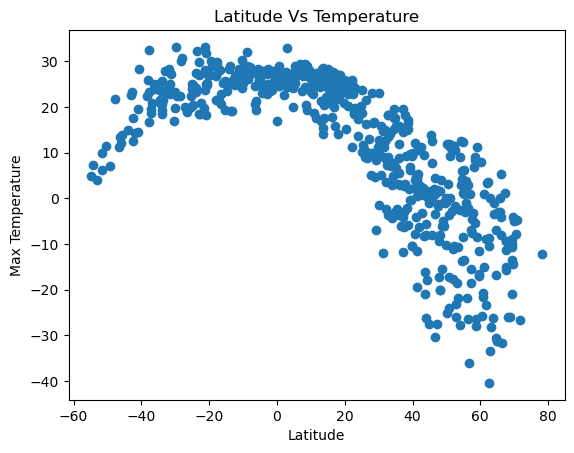

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude Vs Temperature')

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

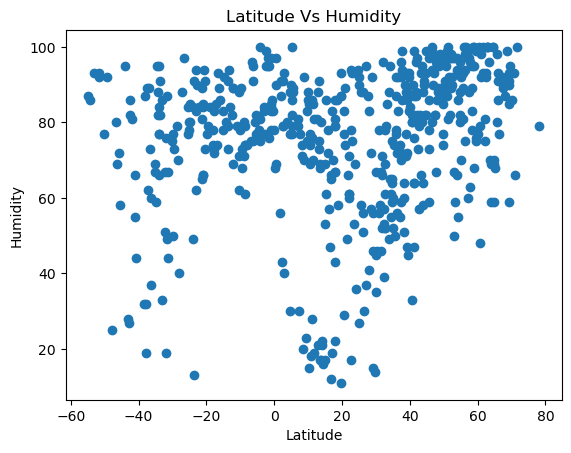

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude Vs Humidity')

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

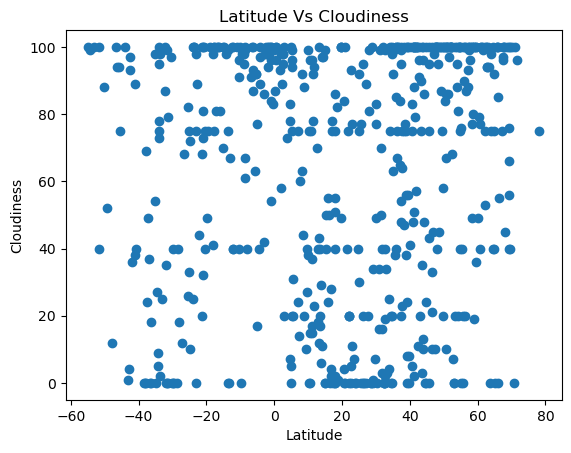

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs Cloudiness')

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

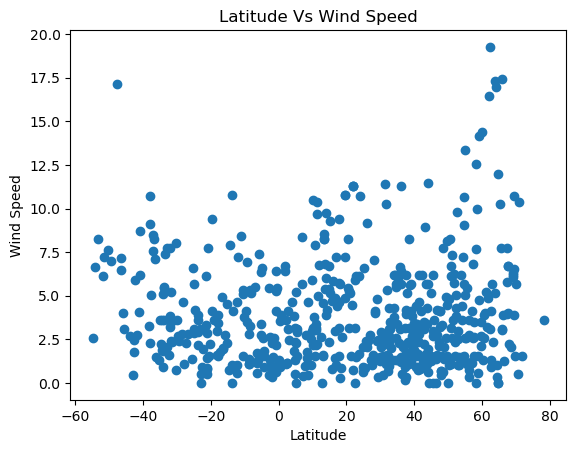

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude Vs Wind Speed')

# Save the figure
plt.savefig("../Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def linear_func_plot(x,y):
    slope, intercept, rvalue, pvalue, stderror = stats.linregress(x,y)
    print(f"The r value is {rvalue}")
    fit = slope * x + intercept
    plt.scatter(x,y)
    plt.plot(x, fit, color='red')
    line_eq = "y = " + str(round(slope)) + "x + " + str(round(intercept))
    plt.annotate(line_eq,(min(x)+10,min(y)+10),fontsize=15,color='red')
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-26.63,100,96,1.54,RU,1706917606
1,college,64.8569,-147.8028,-31.22,70,75,0.00,US,1706917601
2,faya-largeau,17.9257,19.1043,14.00,22,2,9.42,TD,1706917639
4,sitka,57.0531,-135.3300,0.94,60,100,4.12,US,1706917479
6,iqaluit,63.7506,-68.5145,-26.15,70,0,5.14,CA,1706917639


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,20.83,95,27,1.86,ZA,1706917639
5,beaudesert,-27.9833,152.9833,30.71,40,18,1.06,AU,1706917639
7,waitangi,-43.9535,-176.5597,14.90,95,100,2.68,NZ,1706917591
8,punta arenas,-53.1500,-70.9167,4.06,93,100,8.23,CL,1706917640
9,port-aux-francais,-49.3500,70.2167,7.15,92,52,6.98,TF,1706917587


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8171415770690759


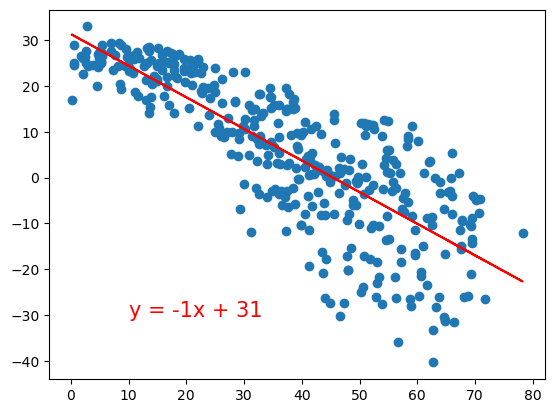

In [38]:
# Linear regression on Northern Hemisphere
linear_func_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r value is 0.6122192762601133


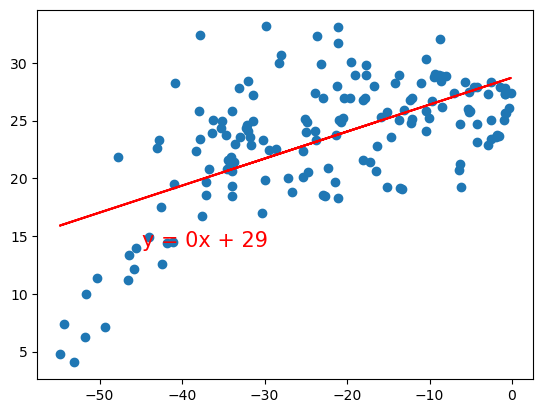

In [39]:
# Linear regression on Southern Hemisphere
linear_func_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** For the northern hemisphere, the further we get from the equator heading north, the lower the max temp gets.

As we move north from the southern tip towards the equator, the max temp increases.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.3902808225544981


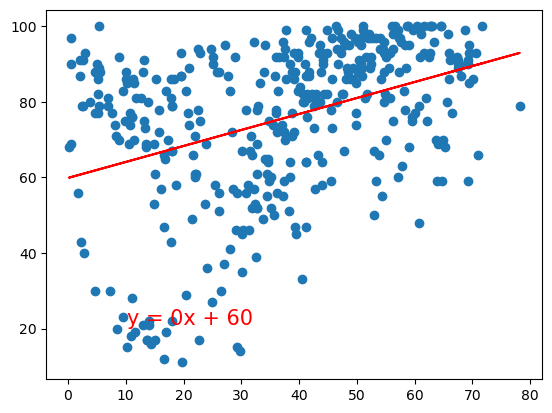

In [40]:
# Northern Hemisphere
linear_func_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r value is 0.3041617432686609


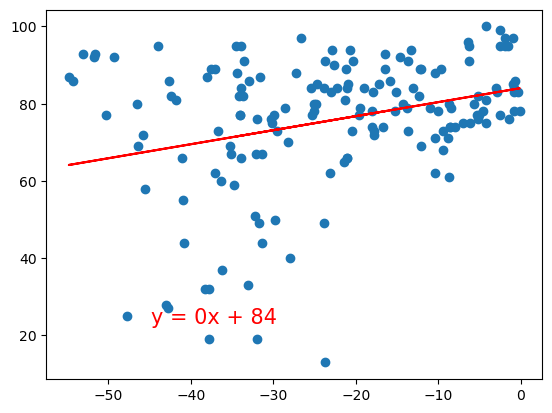

In [41]:
# Southern Hemisphere
linear_func_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** For the northern hemisphere, as we move away from the equator and head north the humidity increases slightly (in general).

For the souther hemisphere, as we move up from the south pole toward the equator, the humidity also slightly increases. Note there are quite a few outliers on both of these plots. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.25900430265691227


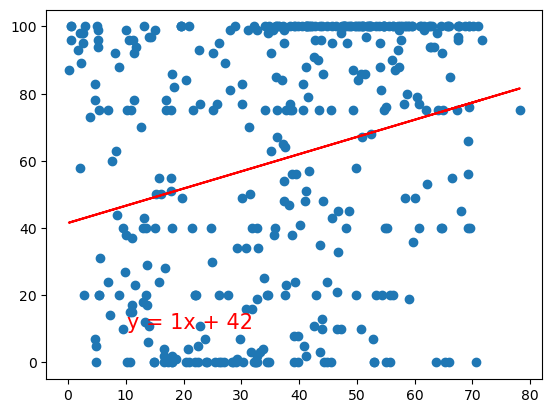

In [42]:
# Northern Hemisphere
linear_func_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r value is 0.30716885718672243


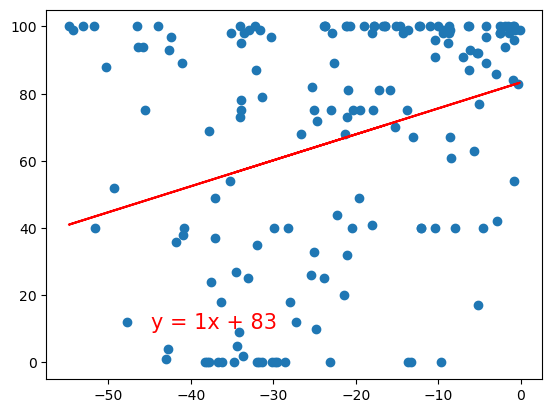

In [43]:
# Southern Hemisphere
linear_func_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** For the northern hemisphere, as we move away from the equator heading north, the cloudiness increases.
For the souther hemisphere, as we move away from the south pole heading toward the equator the cloudiness appears to increase slightly, but the points vary quite a bit.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.09355782372088821


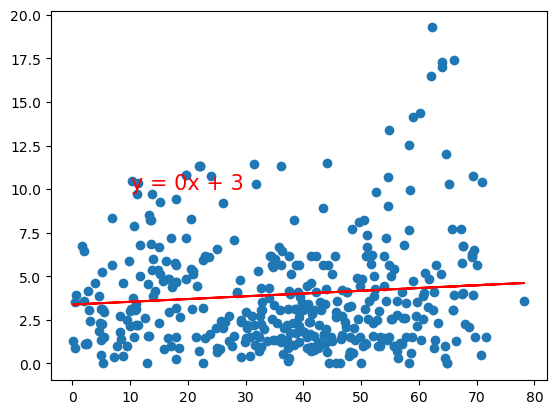

In [44]:
# Northern Hemisphere
linear_func_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r value is -0.3182573844369793


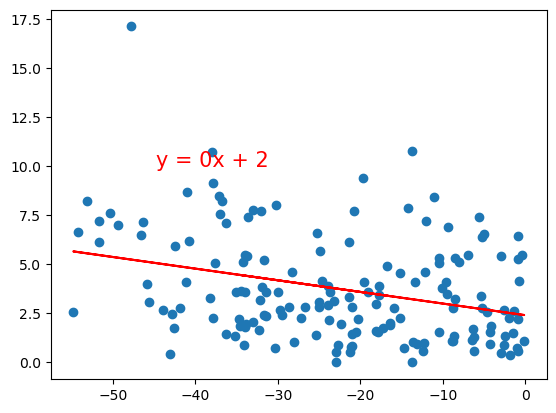

In [45]:
# Southern Hemisphere
linear_func_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** For the northern hemisphere, as we move away from the equator heading north, the wind speed seems to remain the same.
For the souther hemisphere, as we move away from the south pole heading toward the equator the wind speed decreases.